Coefficient: 2.01
Ordonnée à l'origine: 0.82
R² Score: 0.98
MSE: 0.62
MAE: 0.60


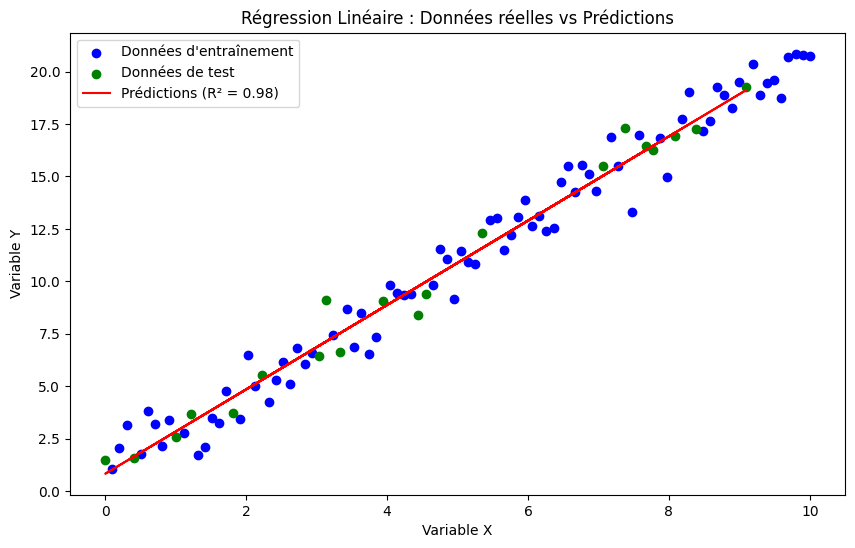

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

class LinearRegressionExample:
    def __init__(self):
        self.model = LinearRegression()
        
    def generate_sample_data(self, n_samples=100):
        np.random.seed(42)
        X = np.linspace(0, 10, n_samples).reshape(-1, 1)
        # Noise
        y = 2 * X + 1 + np.random.normal(0, 1, (n_samples, 1))
        return X, y.ravel()
        
    def fit_and_visualize(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        self.model.fit(X_train, y_train)
        
        y_pred = self.model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train, y_train, color='blue', label='Données d\'entraînement')
        plt.scatter(X_test, y_test, color='green', label='Données de test')
        plt.plot(X_test, y_pred, color='red', label=f'Prédictions (R² = {r2:.2f})')
        plt.xlabel('Variable X')
        plt.ylabel('Variable Y')
        plt.title('Régression Linéaire : Données réelles vs Prédictions')
        plt.legend()
        
        print(f"Coefficient: {self.model.coef_[0]:.2f}")
        print(f"Ordonnée à l'origine: {self.model.intercept_:.2f}")
        print(f"R² Score: {r2:.2f}")
        print(f"MSE: {mse:.2f}")
        print(f"MAE: {mae:.2f}")
        
        return {
            'coefficient': self.model.coef_[0],
            'intercept': self.model.intercept_,
            'r2': r2,
            'mse': mse
        }

regressor = LinearRegressionExample()
X, y = regressor.generate_sample_data()
metrics = regressor.fit_and_visualize(X, y)